In [20]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datetime import datetime
from dateutil import parser

from urllib import parse

### Select File

In [11]:
file_base = ["f ", "fNew ", "fnew-"]

filenames = list()
for ii in range(0,2):
    filenames.append(file_base[1] + "2021 " + str(ii+11))
    
for ii in range(0,3):
    filenames.append(file_base[1] + "2022 " + str(ii+1))
    
for ii in range(0,7):
    filenames.append(file_base[2] + "2022-" + str(ii+4))    
    
print(filenames)
file = filenames[3]

['fNew 2021 11', 'fNew 2021 12', 'fNew 2022 1', 'fNew 2022 2', 'fNew 2022 3', 'fnew-2022-4', 'fnew-2022-5', 'fnew-2022-6', 'fnew-2022-7', 'fnew-2022-8', 'fnew-2022-9', 'fnew-2022-10']


### Load Data

In [17]:
#path = "C:\\Users\\kmp57\\Desktop\\Documents\\GitHub\\grid-uk-ml\\data\\"
path = "\\\\ad\\ap\\homes$\\kmp57\\My Documents\\GitHub\\grid-uk-ml\\data\\"

freq = pd.read_csv(path + 'RawFrequencyData\\' + file + '.csv')
freq['dtm'] = pd.to_datetime(freq['dtm'], format="%Y/%m/%d %H:%M:%S")

start_time = freq.loc[0,"dtm"]
start_str = "Start Time: {}".format(start_time)
print(start_str)

idx = freq.index[-1]
end_time = freq.loc[idx,"dtm"]
end_str = "End Time: {}".format(end_time)
print(end_str)

period = freq.loc[1,"dtm"] - start_time
period_str = "Period: {}".format(period) 
    
fs = 1    # Sampling Freq (Hz)
T = 1 # Measurement time (s)

idx_list = freq_date.index[0::T] # Find index for every 30 min    
    
    
## Rearrange Data by Date
dates = freq.dtm.dt.date[0::86400]


## Build Datetimes and Averages into Dataframe
freq = freq.set_index("dtm")
freq.index.names = ['Datetime']
freq.head()

Start Time: 2022-02-01 00:00:00
End Time: 2022-02-28 23:59:59


,f
Datetime,
2022-02-01 00:00:00,50.102
2022-02-01 00:00:01,50.087
2022-02-01 00:00:02,50.069
2022-02-01 00:00:03,50.054
2022-02-01 00:00:04,50.044


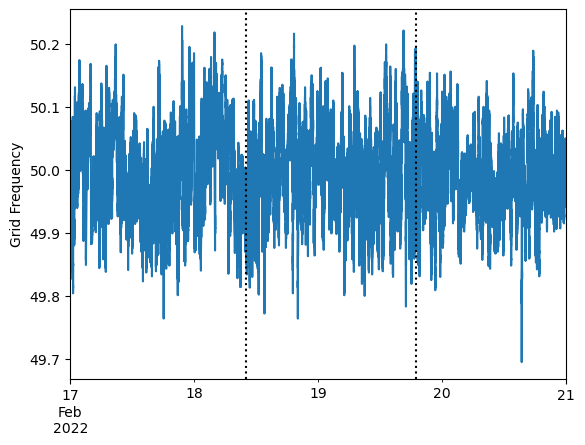

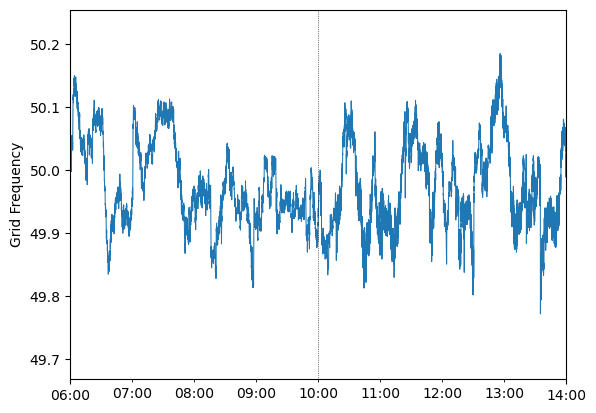

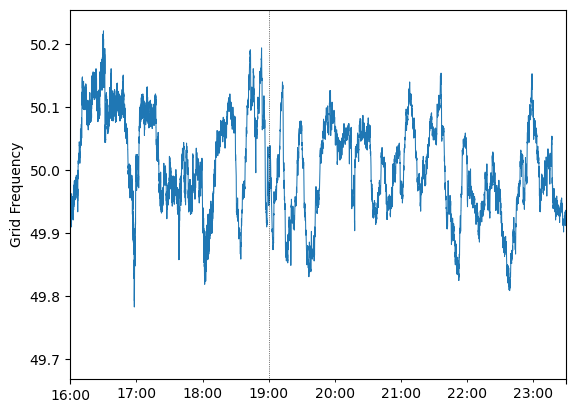

In [73]:
def extract_same_date(date,df):
    date_idx = (df.index.date == date)
    df2 = df.iloc[date_idx]
    return df2

def extract_date_range(date,df,n_days):
    start_date = date - pd.Timedelta(days = n_days)
    end_date = date + pd.Timedelta(days = n_days+2)
    df2 = df.loc[start_date:end_date]
    return df2

date_sel = pd.to_datetime('2022-02-18',format='%Y-%m-%d').date()
freq_date = extract_date_range(date_sel,freq,1)
# freq_date = extract_same_date(date_sel,freq)


fig, ax = plt.subplots()    
# freq_date['f'].between_time('17:00','21:00').plot()
freq_date['f'].plot()
plt.xlabel('')
plt.ylabel('Grid Frequency')



t_start  = pd.to_datetime('2022-02-18_10:00:00',format='%Y-%m-%d_%H:%M:%S')
plt.axvline(t_start,color = 'black', ls = ':')

t_end  = pd.to_datetime('2022-02-19_19:00:00',format='%Y-%m-%d_%H:%M:%S')
plt.axvline(t_end,color = 'black', ls = ':')

    
filename = "Plots\\raw_freq_1" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')




fig, ax = plt.subplots()    
# freq_date['f'].between_time('17:00','21:00').plot()
freq_date['f'].plot(lw = 0.75)
plt.xlabel('')
plt.ylabel('Grid Frequency')


plt.axvline(t_start,color = 'black', ls = ':', lw = 0.5)

ax.set_xlim(pd.Timestamp('2022-02-18 06:00:00'), pd.Timestamp('2022-02-18 14:00:00'))
filename = "Plots\\raw_freq_1_1" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')



fig, ax = plt.subplots()    
freq_date['f'].plot(lw = 0.75)
plt.xlabel('')
plt.ylabel('Grid Frequency')

plt.axvline(t_end,color = 'black', ls = ':', lw = 0.5)

ax.set_xlim(pd.Timestamp('2022-02-19 16:00:00'), pd.Timestamp('2022-02-19 23:30:00'))
filename = "Plots\\raw_freq_1_2" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')

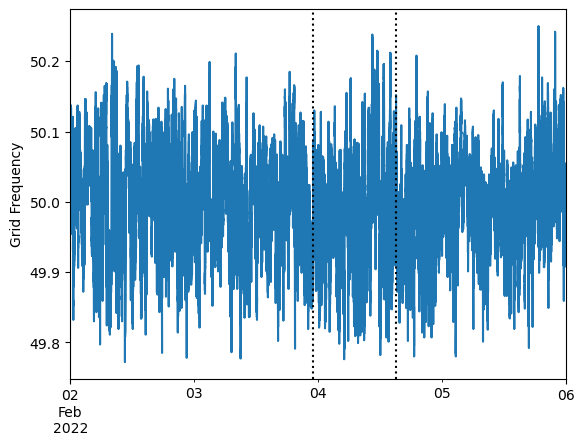

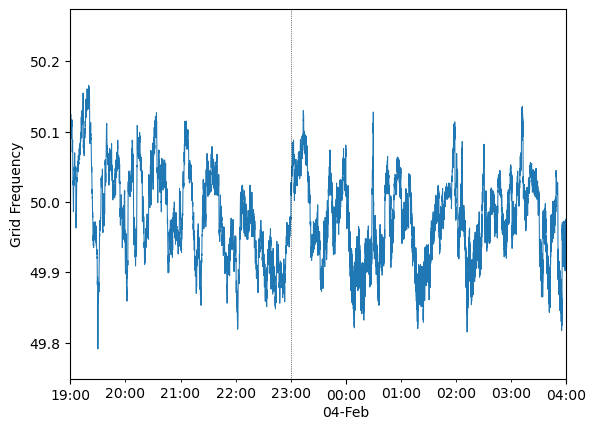

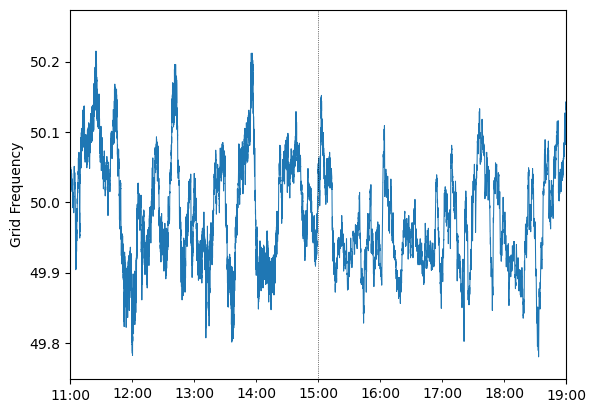

In [77]:
def extract_same_date(date,df):
    date_idx = (df.index.date == date)
    df2 = df.iloc[date_idx]
    return df2

def extract_date_range(date,df,n_days):
    start_date = date - pd.Timedelta(days = n_days)
    end_date = date + pd.Timedelta(days = n_days+2)
    df2 = df.loc[start_date:end_date]
    return df2

date_sel = pd.to_datetime('2022-02-03',format='%Y-%m-%d').date()
freq_date = extract_date_range(date_sel,freq,1)
# freq_date = extract_same_date(date_sel,freq)


t_start  = pd.to_datetime('2022-02-03_23:00:00',format='%Y-%m-%d_%H:%M:%S')
t_end  = pd.to_datetime('2022-02-04_15:00:00',format='%Y-%m-%d_%H:%M:%S')



fig, ax = plt.subplots()    
freq_date['f'].plot()
plt.xlabel('')
plt.ylabel('Grid Frequency')

plt.axvline(t_start,color = 'black', ls = ':')
plt.axvline(t_end,color = 'black', ls = ':')

    
filename = "Plots\\raw_freq_2" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')




fig, ax = plt.subplots()    
freq_date['f'].plot(lw = 0.75)
plt.xlabel('')
plt.ylabel('Grid Frequency')

plt.axvline(t_start,color = 'black', ls = ':', lw = 0.5)

ax.set_xlim(pd.Timestamp('2022-02-03 19:00:00'), pd.Timestamp('2022-02-04 04:00:00'))
filename = "Plots\\raw_freq_2_1" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')



fig, ax = plt.subplots()    
freq_date['f'].plot(lw = 0.75)
plt.xlabel('')
plt.ylabel('Grid Frequency')

plt.axvline(t_end,color = 'black', ls = ':', lw = 0.5)

ax.set_xlim(pd.Timestamp('2022-02-04 11:00:00'), pd.Timestamp('2022-02-04 19:00:00'))
filename = "Plots\\raw_freq_2_2" + ".png"
plt.savefig(filename, dpi=300, bbox_inches='tight')